<a href="https://colab.research.google.com/github/jjcrofts77/TMB-MATH34041/blob/main/content/notebooks/Chapter0/NumpyAndMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.2 Introduction to the NumPy and Matplotlib libraries

In this section we introduce the *numpy* library which is used for numerical mathematics and the *matplotlib* library which is used to create plots.

## NumPy

The preferred approach for importing the *numpy* module is to preface the code with the line


In [1]:
import numpy as np

Then a *numpy* function func is called as np.func. There are many ways to obtain help on a particular function, but perhaps the easiest is to type the function followed by a question mark. For example, to query the cosine function in *numpy* just type



In [ ]:
import numpy as np

np.cos?

A lot of numpy commands will be familiar due to your experience with Matlab. For example, if we wanted to create a vector of evenly spaced numbers over an interval then we can use the np.linspace function.

In [ ]:
import numpy as np

a = np.linspace(0,1,5)
b = np.linspace(1,3,5)

# we can perform arithmetic on vectors of the same dimension
a+b
print('a = {}'.format(a))
print('b = {}'.format(b))
a+=b # this is equivalent to a = a + b
print('a+b = {}'.format(a))

Other similar commands exist such as np.ones and np.zeros to name but two.

In [ ]:
import numpy as np

c = np.ones(4,dtype=int)
d = np.zeros(4,dtype=int)

print('c = {}'.format(c))
print('d = {}'.format(d))

A really useful resource for Matlab users is the [NumPy for MATLAB users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) webpage, which discusses the key differences and similarities between the two langauges.

### Arrays
Arrays will be important in this course as we commonly represent networks as matrices and use the tools of linear algebra to study their properties.

In [ ]:
import numpy as np

# defining and manipulating arrays

A = np.array([[1., 2., 3.], [4., 5., 6.]])
print('A = {}'.format(B))

# size
print('Dimensions of A are {}'.format(np.shape(A))) # 2 by 3

# (2,2) element
print('The (2,3) entry in A is given by '.format(A[1,1]))

# the second column of A
print('The second column of A is given by {} '.format(A[:,1]))

# A^T
print('A transpose is given by {} '.format(A.T))

# matrix multiplication
B = np.array([[1., 1.], [1.,1.], [1.,1.]])
print('B = {}'.format(B))

print('AB is given by {} '.format(A@B)) # the @ symbol denotes matrix multiplication in Python

For further details on array operations see the NumPy for MATLAB users link above.

Once defined, many operations on arrays are identical to MATLAB.



In [ ]:
import numpy as np

# compute sin(x) for x in [0,pi]
x = np.linspace(0,np.pi)
y = np.sin(x)

An important similarity to MATLAB is the idea of broadcasting a variable. In the following example we add the scalar 2 to a vector. Python knows to perform the addition component-wise as if we had added 2*np.ones_like(a).

In [ ]:
import numpy as np

a = np.linspace(0,1,5)
print('a = {} '.format(a))
print('a+2 = {}'.format(a+2))
print('np.ones_like(a) = {}'.format(np.ones_like(a))) # a vector of ones the same dimensions as the vector a
print('a+2*np.ones_like(a) = {}'.format(a+2*np.ones_like(a)))

Just as with MATLAB, using for loops to manipulate large arrays can get really slow. In the following code we run the same operation twice, in the first case we use a for loop and in the second we *vectorise* the code. Play around with the size of the vector and you will see what a difference vectorising your code can have on its speed.

In [ ]:
import numpy as np

# this code smoothes a set of data points by replacing them with their average

import time # time the code

n = 1000000 # try n = 10, 100, 1000, 1000000 and higher ...
print('n = {} '.format(n))
f = np.linspace(0,1,n+1)

# make two copies of f
f_av1 = f.copy()
f_av2 = f.copy()

# looped code
t1 = time.time()
for i in range(1,len(f)-1):
  f_av1[i] = (f[i-1]+f[i]+f[i+1])/3.0
t2 = time.time()

print('For loop took {} seconds'.format(t2-t1))

# vectorised code
t3 = time.time()
f_av2[1:-1] = (f[ :-2]+f[1:-1]+f[2: ])/3.0
t4 = time.time()

print('Vectorised code took {} seconds'.format(t4-t3))

We have only touched on the functionalities of the *numpy* library for manipulating arrays, but you shall have the opportunity to further explore *numpy* in the seminar classes as well as when performing your own network analysis later on in the course.

### Polynomials
Polynomials of a single variable can arise in the analysis of networks when studying the network *adjacency matrix*. In Python a polynomial of the form

$$
\lambda^n+c_1\lambda^{n-1}+c_2\lambda^{n-2}+\cdots+c_{n-1}\lambda+c_n
$$

can be stored as a Python *list*.

Suppose, for example that we have a network on 4 nodes whose adjacency matrix has characteristic polynomial given by

$$
\chi_A(\lambda) = \lambda^4 -6\lambda^2-8\lambda-3
$$

In [ ]:
import numpy as np

# Creating polynomials

# define by coefficients
coeffs = [1,0,-6,-8,-3]
print('The roots of the polynomial are {} \n'.format(np.roots(coeffs)))

# define by roots
roots = [3,-1,-1,-1]
print('The coefficients are given by {} '.format(np.poly(roots)))

The roots of the above polynomial are $\sigma(A) = \{3,-1,-1,-1\}$.

### Linear algebra

Linear algebra is an important tool in the network scientists arsenal since we often represent networks as matrices. Our focus will be on the adjacency matrix representation but there are many others.

We will often want to compute spectral properties of networks.

In [ ]:
import numpy as np

# eigenvalues and eigenvectors

# 5 node network
A = np.array([[0,1,1,0,1],[1,1,1,0,1],[1,1,1,0,1],[0,0,0,1,0],[1,1,1,0,1]])

# compute the determinant and inverse (if possible)
d = np.linalg.det(A)
if d==0.0:
  print('The matrix is singular\n')
else:
  AI = np.linalg.inv(A)

# eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(A)
evals_srt = np.sort(evals)
eval_lg = evals_srt[-1]

print('The largest (most positive) eigenvalue is {} \n'.format(eval_lg))

# let us check Au-\lambdau = 0 for the first pair (\lambda, u)
print('checking the eigenvalue-eigenvector equation for the first eigen pair gives \n')
eval1 = evals[0]
evec1 = evecs[:,0]
np.sum(evec1*evec1)
np.dot(A,evec1) - eval1*evec1

We will also wish to solve matrix equations such as

$$
A\mathbf{x} = \mathbf{b}
$$

mostly when considering centrality measures (I'm thinking Katz index in particular).

Below we see the code for solving the linear system above for

$$
A =\begin{pmatrix}1&2&1\\5&2&5\\1&2&3\end{pmatrix} \quad\text{ and }\quad b = \begin{pmatrix}1\\1\\-3\end{pmatrix}
$$

In [ ]:
import numpy as np

# Solving linear systems of equations

A = np.array([[1,2,1],[5,2,5],[1,2,3]])
b = np.array([1,1,-3])
x = np.linalg.solve(A,b)

print('The solution is x = {} \n'.format(x))

print('Substituting this back into the equation gives {}'.format(np.dot(A,x)-b))

Here the last line checks the solution.

As you can imagine the *numpy* module contains far more resources that those considered in this brief tutorial. Another related module is the [*scipy* module](https://scipy.org/) which provides further advanced mathematical functionalities such as special functions (Bessel functions *etc.*), optimisation routines, integration routines to solve initial value problems and much more. You may well find yourself further expolring these packages as you complete the coursework!

## Matplotlib
The *matplotlib* package is a *numpy* add-on that aims to produce publication quality graphics.

The recommended way to access the *matplotlib* library is as follows



In [42]:
import matplotlib.pyplot as plt

plt?

This provides a MATLAB-like environment for plotting figures in Python.

### Simple figures

Below we plot the function

$$
y(x) = \sin(x)+\frac{1}{3}\cos{3x}
$$

on the range $x\in [-\pi, \pi]$.

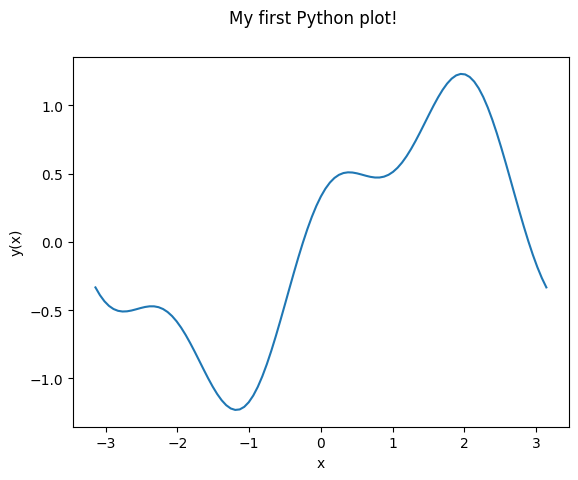

In [72]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi,np.pi,101)
y = np.sin(x)+np.cos(3*x)/3.0

# plot
plt.plot(x,y)
plt.suptitle('My first Python plot!') # add a title

# add axis labels
plt.xlabel('x')
plt.ylabel('y(x)')
plt.savefig('fig1.pdf') # save figure in current directory


Hopefully the similarities with MATLAB mean that the above code is clear.

Just as with MATLAB we can add multiple plots to a single graph and format them by providing additional parameters to the plot function.

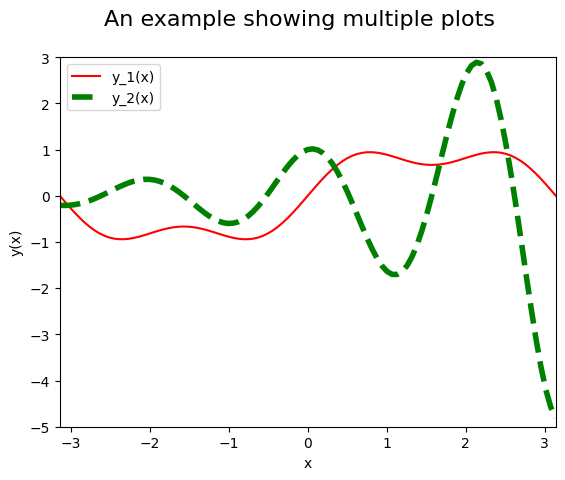

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# function definitions
x = np.linspace(-np.pi,np.pi,101)
y1 = np.sin(x)+np.sin(3*x)/3.0
y2 = np.exp(x/2.0)*np.cos(3*x)

# plot
plt.plot(x,y1,'r-',label='y_1(x)') # label - legend label
plt.plot(x,y2,'g--',lw=4,label='y_2(x)') # lw - line width

# x and y limits
plt.axis([-np.pi,np.pi,-5,3]) # [xmin,xmax,ymin,ymax]

# add title and axis labels
plt.suptitle('An example showing multiple plots',size=16) # size - font size
plt.xlabel('x')
plt.ylabel('y(x)')

# add legend
plt.legend(loc='best') # add legend

plt.savefig('fig1.pdf') # save figure in current directory

### Compound figures

### Displaying mathematical formulae

### Animations